In [1]:

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score, confusion_matrix,
                            classification_report)

uploaded = files.upload()

filename = next(iter(uploaded))
print(f"\n✅ Uploaded file: {filename}")


Saving plants (1).csv to plants (1).csv

✅ Uploaded file: plants (1).csv



📊 Dataset Preview:


,sunlight_hours,watering_freq_per_week,soil_type,water_need
0,7.789136,6,sandy,low
1,11.668008,4,loamy,high
2,9.003943,2,loamy,low
3,11.148641,5,loamy,low
4,9.384333,2,clay,high



🌱 Water Need Distribution:
water_need
low       44
medium    29
high      27
Name: count, dtype: int64

📈 Model Performance:
Accuracy: 0.35
Precision: 0.37
Recall: 0.35
F1-Score: 0.35

📋 Classification Report:
              precision    recall  f1-score   support

        high       0.29      0.40      0.33         5
         low       0.44      0.36      0.40        11
      medium       0.25      0.25      0.25         4

    accuracy                           0.35        20
   macro avg       0.33      0.34      0.33        20
weighted avg       0.37      0.35      0.35        20



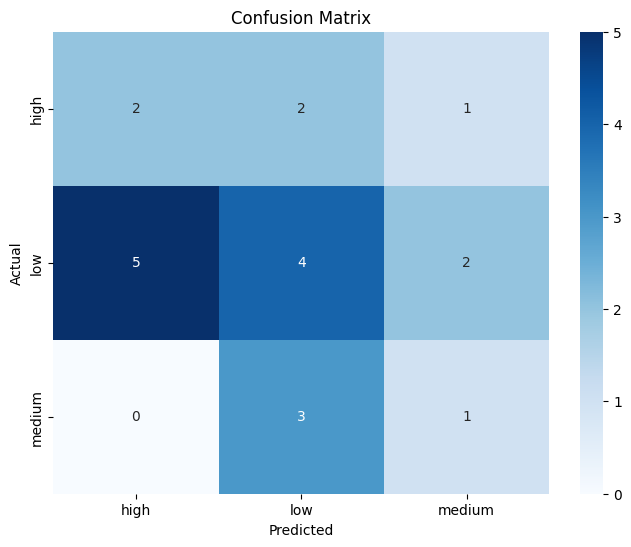

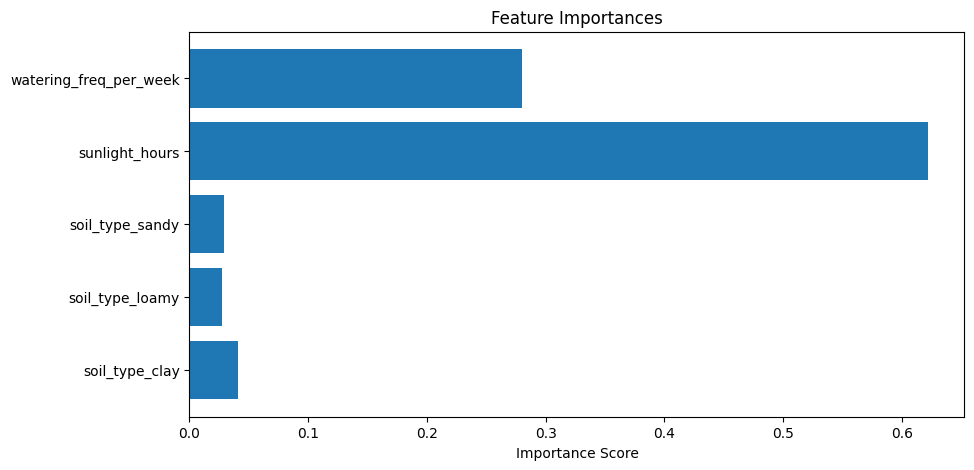

In [4]:
# Load the dataset
data = pd.read_csv(filename)

print("\n📊 Dataset Preview:")
display(data.head())

print("\n🌱 Water Need Distribution:")
print(data['water_need'].value_counts())

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['soil_type'])
    ],
    remainder='passthrough'
)

X = data.drop('water_need', axis=1)
y = data['water_need']

X_processed = preprocessor.fit_transform(X)

### Step 4: Train Model (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
 ### Step 5: Evaluate Model
y_pred = model.predict(X_test)

print("\n📈 Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
 ### Step 6: Feature Importance
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out()) + ['sunlight_hours', 'watering_freq_per_week']
importances = model.feature_importances_

plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.show()